In [177]:
import pandas as pd
import seaborn as sns
import numpy as np

In [178]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [179]:
b = df.body_mass_g
df.body_mass_g = b.fillna(b.mean()) # Fills the NaN with average
l = df.bill_length_mm
df.bill_length_mm = l.fillna(l.mean())

In [180]:
df.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           0
sex                  11
dtype: int64

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['species'])
print(df_train.shape, df_test.shape)

(240, 7) (104, 7)


In [183]:
# df_train has 240 rows and 7 columns
# df_test has 104 rows and 7 columns

In [184]:
df.corr() # to find out which features correlate

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [185]:
from sklearn.tree import DecisionTreeRegressor

In [194]:
features= ['bill_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 4) # Increase max_depth to see effect in the plot
dt_regression.fit(df_train[features], df_train['body_mass_g'])

DecisionTreeRegressor(max_depth=4)

In [195]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [196]:
predictionsOnTrainset = dt_regression.predict(df_train[features])
predictionsOnTestset = dt_regression.predict(df_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, df_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, df_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 566.0976568749692
RMSE on test set 696.9599656365517


In [197]:
# RMSE measures the average difference between the predicted values and the actual values in a dataset

In [198]:
# Yes, the RMSE on the test set has a higher value. I did expect this difference, because 
# on a test set it would make more sense that the value would be higher because of new 
# values that are not trained.

In [199]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

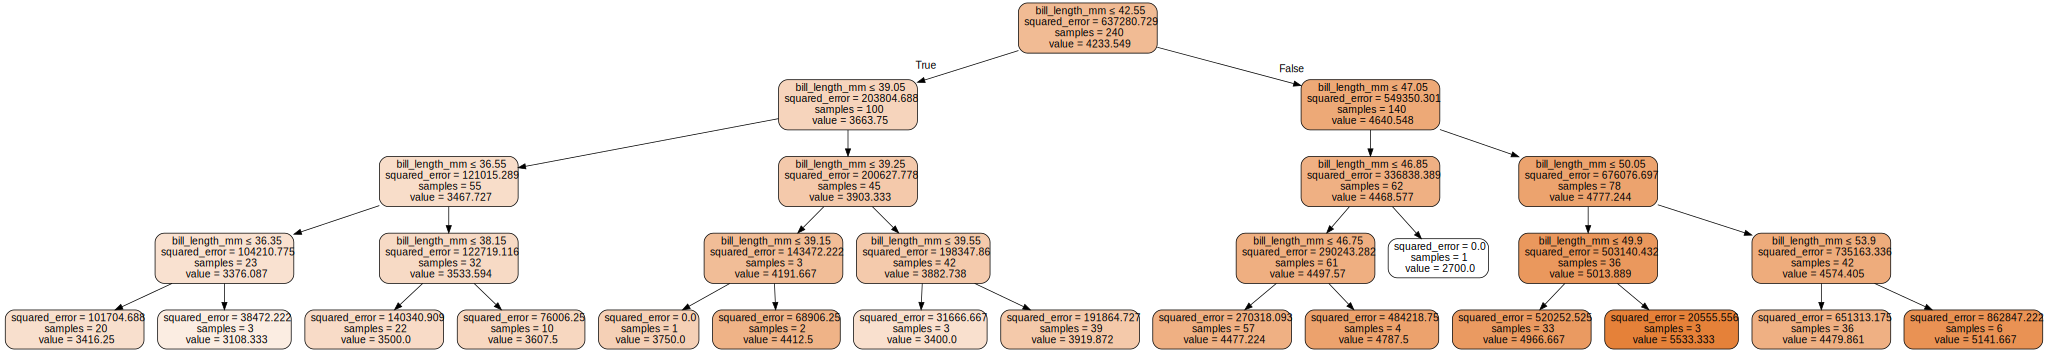

In [200]:
plot_tree_regression(dt_regression, features)

In [193]:
# Yes, it compares the bill_length_mm and puts it to the left if its true, 
# and right if false. After that it calculates the values then the same riddle goes on.